In [ ]:
!pip install sympy

In [24]:
from sympy import symbols, diff, simplify,  init_printing
init_printing()

# Curve (equations from v2 whitepaper)
x, y, D, A = symbols("x y D A")
k = A*x*y/(D/2)**2
f = x*y + k*(x+y)*D - (D/2)**2 - k*D**2

display(f)

df_dD = diff(f, D)
df_dy = diff(f, y)

print("df / dD")
print(df_dD)
print("df / dy")
print(df_dy)

# Newton's method for y
y_n = y - f / df_dy

# get_y - StableSwap code
# x = token in, y = token out
n = 2
a = A*n**n
s = x
p = x
c = D**(n + 1) / (n**n * p * a)
b = s + D / a
y_code = (y*y + c) / (2*y + b - D)

display(simplify(y_n - y_code))

df / dD
-4*A*x*y*(x + y)/D**2 - D/2
df / dy
-4*A*x + 4*A*x*y/D + 4*A*x*(x + y)/D + x


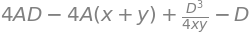

In [25]:
# Equations from v1 whitepaper
x, y, D, A = symbols("x y D A")
n = 2
f = A*D*n**n + D**(n+1) / (n**n * x*y) - A*n**n * (x + y) - D

display(f)

df_dD = diff(f, D)

# Newton's method for D
d_n = D - f / df_dD

# get_D - StableSwap code
a = A*n**n
s = x + y
p = D**(n + 1) / (n**n * x * y)
d_code = (a*s + n*p)*D / ((a - 1)*D + (n + 1)*p)

# Compare d_n with d_code
display(simplify(d_n - d_code))

In [ ]:
N_COINS = 3

LENDING_PRECISION = 10 ** 18
# 1, 1e12, 1e12
PRECISION_MUL = [1, 1000000000000, 1000000000000]
# 1e18, 1e30, 1e30
RATES = [1000000000000000000, 1000000000000000000000000000000, 1000000000000000000000000000000]

# DAI, USDC, USDT
balances = [1e18, 1e6, 1e6]

# Normalizes coin balances to 1e18
def xp():
    result = [r for r in RATES]
    for i in range(N_COINS):
        result[i] = result[i] * balances[i] / LENDING_PRECISION
    return result

xp()